# Clustering

In this case study, we will use Data Mining algorithms to cluster iris flower samples based on features such as *petal width*, *petal length*, *sepal width*, and *sepal length*. 
* We will explore and visualise the available data.
* We will compare different clustering algorithms, namely: *k-means*, *hierarchical clustering*, and *DBSCAN*.
* We will evaluate the performance of the aforementioned algorithms.
* We will characterise the obtained clusters using *Apriori algorithm*.

<div style="text-align: center;">
    <img src="../img/blueflagiris_flower.jpg" width="300" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml">https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml</a></p>
</div>

<div style="text-align: center;">
    <img src="../img/iris-flower-types.png" width="500" height="200">
    <p><em>Iris flower.</em> Source: <a href="https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e">https://plainenglish.io/blog/iris-flower-classification-step-by-step-tutorial-c8728300dc9e</a></p>
</div>

**Note**: in this dataset, each entry is assigned to a class (a type of iris flower). However, in most real-world scenarios where we apply clustering procedures, true labels are unknown. So for the purpose of clustering, we will not consider the true class label.

## Task #1: Import Dataset and Libraries

In [1]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3 

! pip install nbformat==5.9.2

In [2]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data from table file where entries are separated with a space
data = pd.read_table("../data/IrisDataset/data.all", sep=" ")
# show first 5 rows of the dataframe
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**QUESTIONS**

* How many samples exist in the dataframe?

*Hint*: you can check the number of rows of a dataframe using `len` function.
* What are the features? What are their types?

*Hint*: you can check the columns of a dataframe using [`columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute. To get a summarasied information about the data in a dataframe, you can use [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.
* How many distinct flower classes exist in the dataframe? What are they? 

*Hint*: you can use the methods [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html) and [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html).

In [4]:
# ANSWERS
# How many samples exist in the dataframe?
print(f"The number of samples: {len(data)}") # using len 

The number of samples: 150


In [5]:
# ANSWERS
# What are the features?
print(f"Available features: {data.columns.tolist()}")
# What are their types?
data.info()

Available features: ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Using `data.info()`, we note that four features (`sepal length`, `sepal width`, `petal length`, `petal width`) are given by real numbers (`Dtype` is equal to `float64`). These are quantative features (variables). In contrast, `class` attribute is of type `object`, which implies that it is a caategorical feature. 

In [6]:
# ANSWERS
# How many distinct flower classes exist in the dataframe? What are they?
print(f"The number of distinct flower classes: {data['class'].nunique()}")
print(f"Distinct flower classes: {data['class'].unique()}")

The number of distinct flower classes: 3
Distinct flower classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Task #2: Perform Exploratory Data Analysis

First, we will explore the most common **data quality issues**:
* [missing values](#missing-vals)
* [duplicates](#duplicates)

Second, we will use [**descriptive statistics**](#desc-stats) to have get a statistical summary of the data. 

We will then use [**data visualisaiton**](#data-vis) to get a better understanding of the data.

<a id="missing-vals"></a>
### Missing Values

To check the missing values, several approaches can be used:

1. The `info()` mwthods provides a summary of a dataframe in terms of the types of values, non-null values and memory usage. Thus, by comparing the number of non-null values of each column with the total number of entries, one can have an idea of missing values.
2. Using the [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method. By summing the resulting values, we obtain the number of null values for each column.
3. To get the rows with any missing values, you can use `isna()` followed by `any(axis=1)`.

In [7]:
# method 1: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As there are as many non-null values for each of the attributes (`150 non-null`) than the total number of rows (see `RangeIndes: 150 entries`), it means that there is no *missin values* in our DataFrame.

In [8]:
# method 2: using isna() 
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

Again, we can see that there is no missing values in the DataFrame.

In [9]:
# method 3: get the rwos with missing values
data[data.isna().any(axis=1)]

,sepal length,sepal width,petal length,petal width,class


The return DataFrame is empty.

To **remove** the rows with missing values, you can use the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method. Check the parameters for more details.

*Tip*: keep a track of the number of rows in the initial DataFrame and during and after the cleaning:
```
print(f"Before: {len(df)}")
df_cleaned = df.dropna()
print(f"After: {len(df_cleaned)}")
```

In [10]:
print(f"Initial: {len(data)}")
data_cleaned = data.dropna()
print(f"After removing missing values: {len(data_cleaned)}")

Initial: 150
After removing missing values: 150


<a id="duplicates"></a>
### Duplicates

To check duplicated values, you can use the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) method. You can specify the paramater `keep` (`'first'`, `'last'`, `False`) to determine which duplicates (if any) to be marked as `True` in the resulting boolean Series indicating duplicate rows.

In [11]:
# check the duplicates
data_cleaned.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [12]:
# check the duplicates of the class column and keep the last occurence
data_cleaned['class'].duplicated(keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Name: class, Length: 150, dtype: bool

In [13]:
# another option using subset parameter
data_cleaned.duplicated(subset=['class'], keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149    False
Length: 150, dtype: bool

To have a better undertanding of the functioning of `duplicated()`, let's substract the rows corresponding to the class clabel `'Iris-setosa'`:

In [14]:
# substract Iris-setosa
data_setosa = data_cleaned[data_cleaned['class'] == 'Iris-setosa']
data_setosa

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


All rows contain the value `'Iris-setosa'` in the `class` column. So, if we consider only this column, it contains many duplicates.

When the parameter `keep='first'`, then the first occurrence is considered to be *original* and all the others *duplicates*, that's why the returned value will be `False` (="not a duplicate") for the first row and `True` for all the rest:

In [15]:
data_setosa['class'].duplicated(keep='first')

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: class, dtype: bool

In contrast, when `keep='last'`, it's the last occurrence that is considered original and all the previous ones as duplicates:

In [16]:
data_setosa['class'].duplicated(keep='last')

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49    False
Name: class, dtype: bool

It is possible to check the total number of duplicates by summing the returned values:

In [17]:
# count the number of duplicates
data_cleaned.duplicated().sum()

1

We can see that there is one case of duplicates. Let's check the corresponding rows. We set the parameter `keep=False` to display all rows and not just the second occurence:

In [18]:
data_cleaned[data_cleaned.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


We can keep these rows or we can drop them (or any of them) using [`drop_duplicates`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). Let's keep the first occurrence.

In [19]:
# remove duplicates
data_cleaned = data_cleaned.drop_duplicates(keep='first')
# show the stats
print(f"Initial: {len(data)}")
print(f"After removing duplicates: {len(data_cleaned)}")


Initial: 150
After removing duplicates: 149


Save the cleaned DataFrame to `data/processed/data_cleaned.csv`.

In [20]:
# save to file
data_cleaned.to_csv('../data/processed/data_cleaned.csv')

<a id='desc-stats'></a>
### Descriptive Statistics

To obtain the statistical summary of the dataframe, we can use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). For different columns, it displays the count, the average value, the standard deviation, the min and max values, percentiles. 
By default, in mixed data types DataFrames, it displays the values for quantative data only:

In [21]:
# summarised statistics
data_cleaned.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# summarised statistics with object data
data_cleaned.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843624,3.059732,3.748993,1.194631,NaN
std,0.830851,0.436342,1.767791,0.762622,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Based on the range of values of the quantative attributes, we can see that their scales are comparable. So there is no need to scale them for futher use in algorithms.

To obtain the number of values for `class` column, we can use [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html):

In [23]:
print(data_cleaned['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: count, dtype: int64


**QUESTIONS**

* Select the samples with the largest `sepal length`. Which type of iris flower it belongs to?

In [24]:
# ANSWERS
# Select the samples with the largest `sepal length`
max_sepal_length = data_cleaned['sepal length'].max()
print(f'The biggest sepal length = {max_sepal_length}')
flower_max_sepal_length = data_cleaned[data_cleaned['sepal length'] == max_sepal_length]
# Which type of iris flower it belongs to?
print(f"The flower with the biggest sepal length: {flower_max_sepal_length['class'].values[0]}")

The biggest sepal length = 7.9
The flower with the biggest sepal length: Iris-virginica


<a id='data-vis'></a>
### Data Visualisation

* [Pairplot](#pairplot)
* [Correlation analysis](#correlation)
* [Class-wise boxplot](#boxplot)
* [Scatter plot with PCA](#pca)

<a id='pairplot'></a>
#### Pairplot

Let's start by plotting a pairplot using [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). 

c:\Users\dnurb\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnurb\AppData\Local\Temp\ipykernel_12392\948072711.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x2000 with 0 Axes>

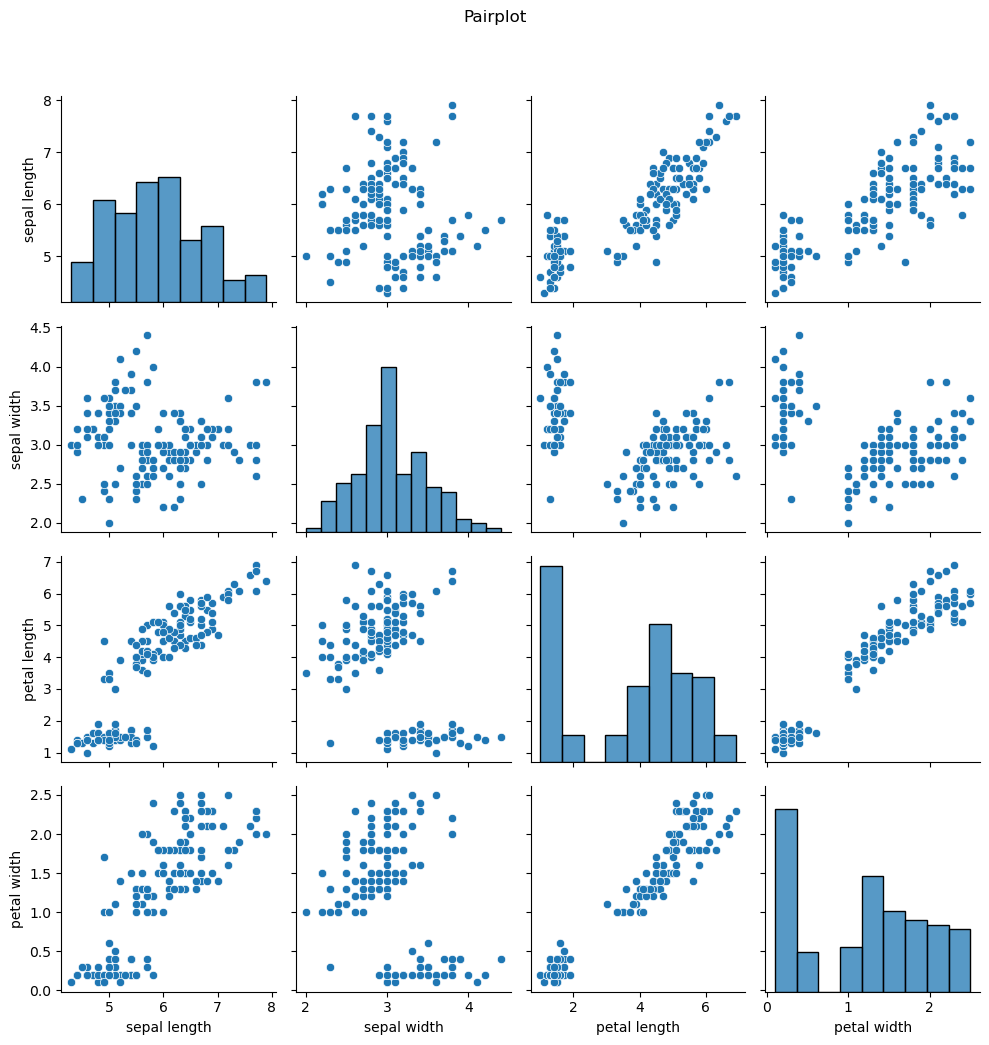

In [25]:
# select columns to plor
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
# pair plot
g = sns.pairplot(data=data_cleaned[cols])
# add a title to the figure
g.figure.suptitle('Pairplot', y=1.04)
# Adjust the layout to prevent title overlap
plt.tight_layout()


From this plot, we can observe the following:
* there is a strong positive linear relationship between `petal width` and `petal length`
* we can observe two distinct groups, see `sepal length` vs. `petal length` for example or `petal length` vs. `petal width`. This can already give us an initial idea about a potential number of clusters and which features may influence more the separation.


We can make use of the `class` column to have a look on the data through the class labels. We will assign colors based on the value of `class`. To do so, we will assign the value to `hue` parameter. Mind that by default, the diagonal elements will disply a layered kernel density estimate (KDE). To change that, you can assign value to the `diag_kind` parameter.

c:\Users\dnurb\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dnurb\AppData\Local\Temp\ipykernel_12392\2791738706.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x2000 with 0 Axes>

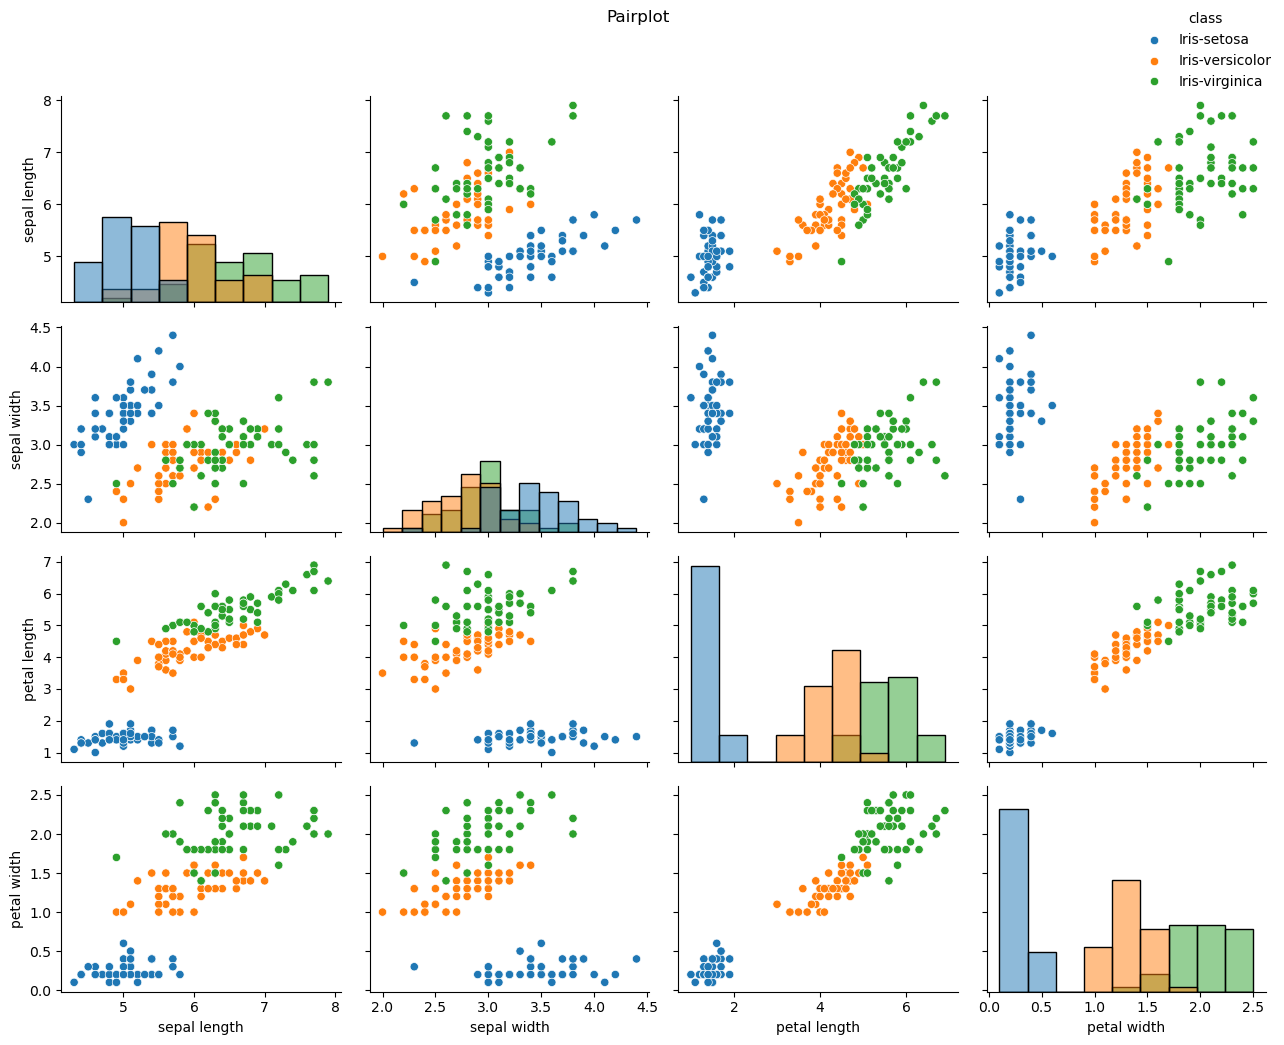

In [26]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
# pair plot
g = sns.pairplot(data=data_cleaned[cols], hue='class', diag_kind='hist')
# add a title to the figure
g.figure.suptitle('Pairplot', y=1.04)
# Remove the default legend
g._legend.remove() 
# Add new legend
g.add_legend(loc='upper right')
# Adjust the layout to prevent title overlap
plt.tight_layout()

When using colors, we can see that a groups that stands apart corresponds to `Iris-setosa`. We can also observe that some values of `Iris-versicolor` and `Iris-virginica` are similar. This implied that a separation of the entries of these two classes might be difficult.

**Note**: in this use case, there are true class labels which is not usually the case. 

<a id='correlation'></a>
#### Correlation Analysis

**QUESTION**

* Plot the correlation matrix and comment on the result.

*Hint*: to calculate correlations, use the [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of a DataFrame.

In [27]:
# ANSWER
# Compute correlation matrix
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
corr = data_cleaned[features].corr()
print(f"Correlation matrix:\n{corr}")

Correlation matrix:
              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.118129      0.873738     0.820620
sepal width      -0.118129     1.000000     -0.426028    -0.362894
petal length      0.873738    -0.426028      1.000000     0.962772
petal width       0.820620    -0.362894      0.962772     1.000000


Similar to what we have observed on the pairplot, `petal width` and `petal length` are highly positively correlated (0.9628). We can also observe a rather strong correlation between `sepal length` and `petal length` (0.8737) and between `sepal length` and `petal width`. 

As `petal width` and `petal length` are highly correlated, it is possible to exlude one of these features from the consideration by clustering algorithms in order to descrease dimensionality. But let's keep them for now.

We can visualise this correlation matrix using a heatmap:

<Axes: >

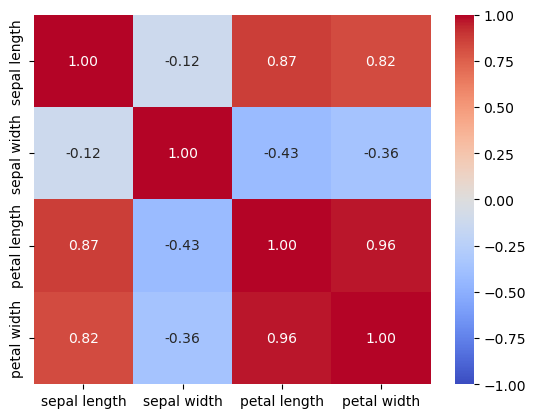

In [28]:
# Create heatmap
sns.heatmap(
        corr,
        annot=True,  # Show correlation values
        cmap='coolwarm',  # Color scheme: red for positive, blue for negative
        vmin=-1, vmax=1,  # Fix scale between -1 and 1
        center=0,  # Center colormap at 0
        fmt='.2f'  # Format correlation values to 2 decimal places
    )

<a id='boxplot'></a>
#### Class-wise Boxplot

Let's display boxplots of each feature using [`seaborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot).

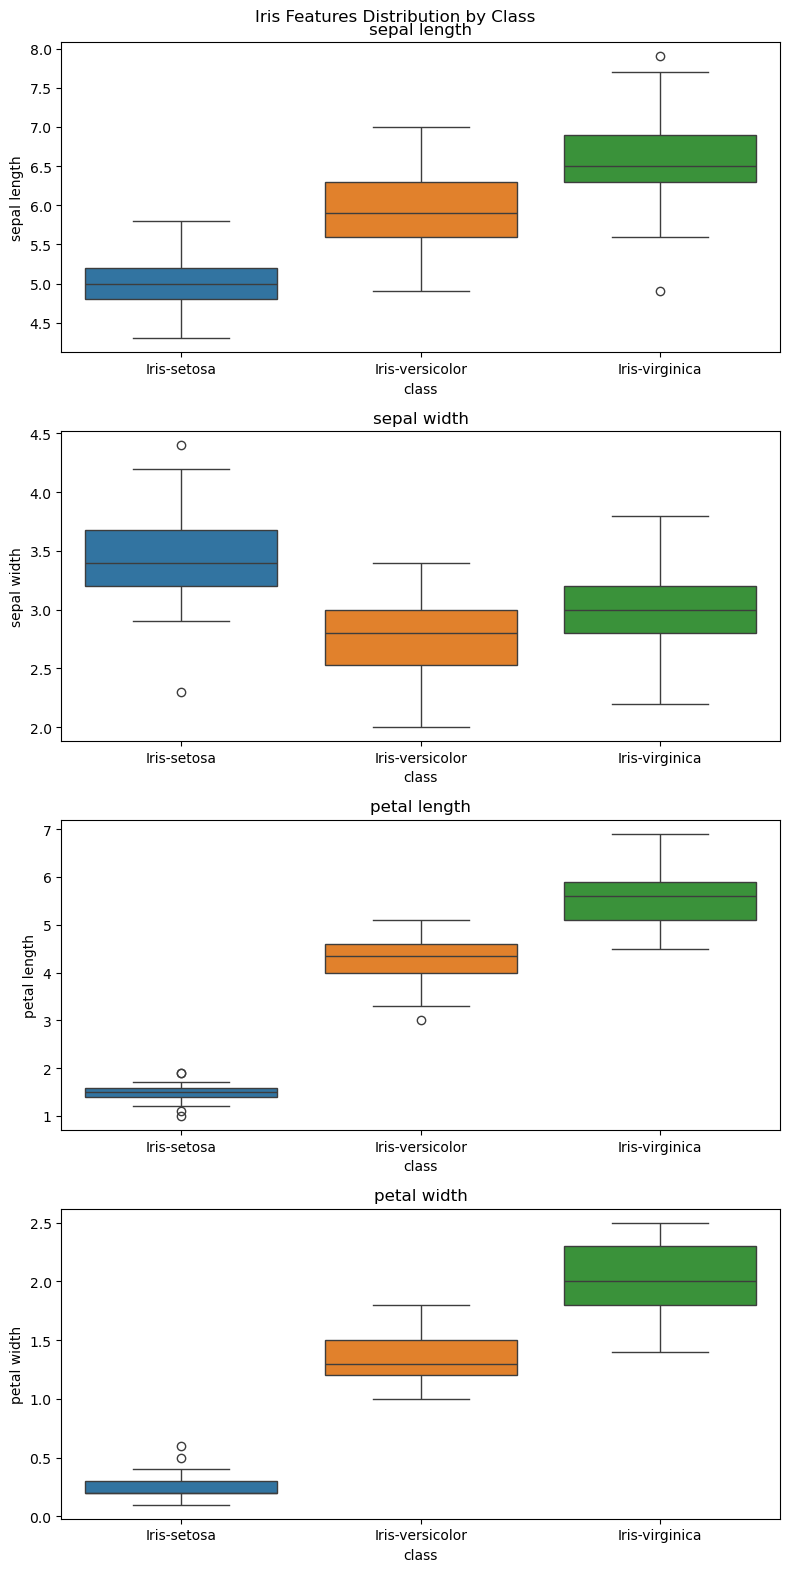

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle('Iris Features Distribution by Class')

for ax, feature in zip(axes, features):
    sns.boxplot(data=data_cleaned, x='class', y=feature, ax=ax, hue='class')
    ax.set_title(feature)

plt.tight_layout()

Again, when considering `petal length` or `petal width`, we can see that the distribution of `Iris-setosa` is different from the rest. Moreover, we see the overlapping values for two remaining classes.

<a id='pca'></a>
#### Scatter Plot with PCA

As there are four attributes that make it hard to visualise the whole dataset in one plot, we may want to use [*Principal Component Analysis* (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [30]:
# principal compomemt analysis
from sklearn.decomposition import PCA

This implementation only centers the input data but does not apply scaling for each feature before applying the Singular Value Decomposition (SVD). Thus, `pca.components_` are the eigenvectors of the covariance matrix. For standardised data ($mean = 0, variance = 1$), `pca.components_` are the eigenvectors of the correlation matrix.

In [31]:
# create PCA model with 2 components
pca = PCA(n_components=2)
# apply PCA to numerical data
pca_result = pca.fit_transform(data_cleaned[features])

In [32]:
pca_result

array([[-2.67416999e+00,  3.19031990e-01],
       [-2.70474422e+00, -1.78633517e-01],
       [-2.87970764e+00, -1.44700104e-01],
       [-2.73631253e+00, -3.18119990e-01],
       [-2.71883366e+00,  3.27304880e-01],
       [-2.27045642e+00,  7.41800106e-01],
       [-2.81134481e+00, -8.75868923e-02],
       [-2.61641097e+00,  1.62999737e-01],
       [-2.87770274e+00, -5.78021598e-01],
       [-2.66328514e+00, -1.15331593e-01],
       [-2.49650941e+00,  6.44119463e-01],
       [-2.60331561e+00,  1.52403732e-02],
       [-2.77679829e+00, -2.36588581e-01],
       [-3.21505838e+00, -5.10355009e-01],
       [-2.63351612e+00,  1.17740209e+00],
       [-2.37488401e+00,  1.33942674e+00],
       [-2.61300078e+00,  8.11350638e-01],
       [-2.63838629e+00,  3.11801189e-01],
       [-2.18903574e+00,  8.71129748e-01],
       [-2.57793010e+00,  5.14789822e-01],
       [-2.30005733e+00,  3.88967932e-01],
       [-2.53375309e+00,  4.34100266e-01],
       [-3.20645947e+00,  1.36111950e-01],
       [-2.

In [33]:
# the right singular vectors of the centered input data, parallel to its eigenvectors
# .T is used to transpose the array
pca.components_.T

array([[ 0.36270365,  0.65185865],
       [-0.083933  ,  0.73458755],
       [ 0.85636088, -0.17387633],
       [ 0.35783706, -0.07230801]])

It is possible to chech the variance explained by the principal components with `pca.explained_variance_ratio_`:

In [34]:
pca.explained_variance_ratio_

array([0.92497081, 0.05276705])

In [35]:
pca_result

array([[-2.67416999e+00,  3.19031990e-01],
       [-2.70474422e+00, -1.78633517e-01],
       [-2.87970764e+00, -1.44700104e-01],
       [-2.73631253e+00, -3.18119990e-01],
       [-2.71883366e+00,  3.27304880e-01],
       [-2.27045642e+00,  7.41800106e-01],
       [-2.81134481e+00, -8.75868923e-02],
       [-2.61641097e+00,  1.62999737e-01],
       [-2.87770274e+00, -5.78021598e-01],
       [-2.66328514e+00, -1.15331593e-01],
       [-2.49650941e+00,  6.44119463e-01],
       [-2.60331561e+00,  1.52403732e-02],
       [-2.77679829e+00, -2.36588581e-01],
       [-3.21505838e+00, -5.10355009e-01],
       [-2.63351612e+00,  1.17740209e+00],
       [-2.37488401e+00,  1.33942674e+00],
       [-2.61300078e+00,  8.11350638e-01],
       [-2.63838629e+00,  3.11801189e-01],
       [-2.18903574e+00,  8.71129748e-01],
       [-2.57793010e+00,  5.14789822e-01],
       [-2.30005733e+00,  3.88967932e-01],
       [-2.53375309e+00,  4.34100266e-01],
       [-3.20645947e+00,  1.36111950e-01],
       [-2.

**QUESTIONS**

* Create a DataFrame `pca_df` containing the result of PCA. This DataFrame should contain 2 columns: `PC1` and `PC2`
* Create a new DataFrame `data_cleaned_pca` by contactenating `data_cleaned` and `pca_df`. Mind that the index of `data_cleaned` has been modified during the cleaning step. Reset the index before concatenation.


In [36]:
# ANSWER
# Create DataFrame with PCA values
pca_df = pd.DataFrame(
    data=pca_result,
    columns=['PC1', 'PC2']
    )

In [37]:
# ANSWER
# concatenate with data_cleaned
data_cleaned_pca = pd.concat([data_cleaned.reset_index(), pca_df], axis=1)

In [38]:
data_cleaned_pca

,index,sepal length,sepal width,petal length,petal width,class,PC1,PC2
0,0,5.1,3.5,1.4,0.2,Iris-setosa,-2.674170,0.319032
1,1,4.9,3.0,1.4,0.2,Iris-setosa,-2.704744,-0.178634
2,2,4.7,3.2,1.3,0.2,Iris-setosa,-2.879708,-0.144700
3,3,4.6,3.1,1.5,0.2,Iris-setosa,-2.736313,-0.318120
4,4,5.0,3.6,1.4,0.2,Iris-setosa,-2.718834,0.327305
...,...,...,...,...,...,...,...,...
144,145,6.7,3.0,5.2,2.3,Iris-virginica,1.953752,0.182135
145,146,6.3,2.5,5.0,1.9,Iris-virginica,1.536230,-0.382204
146,147,6.5,3.0,5.2,2.0,Iris-virginica,1.773860,0.073456
147,148,6.2,3.4,5.4,2.3,Iris-virginica,1.910099,0.115266


In [39]:
# create interactive plots
import plotly.express as px 

In [40]:
# Create interactive scatter plot
fig = px.scatter(
        data_cleaned_pca,
        x='PC1',
        y='PC2',
        color='class',
        title='PCA visualization of all flowers'
)
# Add variance explained
var_explained = pca.explained_variance_ratio_
fig.update_layout(
        xaxis_title=f"PC1 ({var_explained[0]:.1%} variance explained)",
        yaxis_title=f"PC2 ({var_explained[1]:.1%} variance explained)"
)
fig.show()

To check the contributions of each feature to the variance, let's see the (scaled) loadings. Loadings are given by `eigenvectors * sqrt(explained variance)` (Eigenvectors are unit-scaled loadings. They show direction of maximum variance). 

*Note*: There are two ways to understand *loadings*:

1. Loadings as correlations between the original variables and the principal components. They are bounded between -1 and 1. In this case use `pca.components_`. 
2. Scaled loadings which show how much each original variable contributes to the variance of each principal component. In this case use `pca.components_.T * np.sqrt(pca.explained_variance_)`. Mind that these scaled loadings are not bounded between -1 and 1.

In [41]:
# numeric calculations
import numpy as np

**QUESTIONS**

* Calculate PCA `loadings`
* Create a DataFrame for them. Display this DataFrame
* Comment on the results

In [42]:
# ANSWER
# loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(loadings)

[[ 0.747134    0.32071362]
 [-0.17289377  0.36141613]
 [ 1.76401957 -0.08554693]
 [ 0.7371093  -0.03557545]]


In [43]:
# ANSWER
# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data_cleaned.columns[:-1])
print(loadings_df)


                   PC1       PC2
sepal length  0.747134  0.320714
sepal width  -0.172894  0.361416
petal length  1.764020 -0.085547
petal width   0.737109 -0.035575


Loadings information can indicate a direction of the relationship (positive or negative), and the strength of the contribution to principal components. 
Thus, from the DataFrame above, we can state the following:

* `petal length` is the most important contributor to the variability of the PC1 (1.76). The higher petal length, the higher value of PC1. In contrast, `sepal width` contributes negatively to PC1.
* `sepal length` and `sepal width` contribute rather similarly to PC2. 

We can compare the results with standardized input data. It is a better way to do it.

Let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$. 

In [44]:
# scaler
from sklearn.preprocessing import StandardScaler
# scale data
scaler = StandardScaler()
data_cleaned_scaled = scaler.fit_transform(data_cleaned[features])
# create PCA model
pca_scaled = PCA(n_components=2)
# apply PCA to scaled numerical data
pca_scaled_result = pca_scaled.fit_transform(data_cleaned_scaled)

In [45]:
# explained variance
pca_scaled.explained_variance_ratio_

array([0.72991022, 0.22858172])

In [46]:
pca_scaled.components_.T

array([[ 0.52206199,  0.3733408 ],
       [-0.26769214,  0.92485914],
       [ 0.58031186,  0.02431115],
       [ 0.56482771,  0.06827292]])

In [47]:
# Create DataFrame with PCA values
pca_scaled_df = pd.DataFrame(
    data=pca_scaled_result,
    columns=['PC1', 'PC2']
    )
pca_scaled_df

,PC1,PC2
0,-2.252692,0.479299
1,-2.071004,-0.674234
2,-2.353147,-0.340442
3,-2.288762,-0.595441
4,-2.377294,0.646885
...,...,...
144,1.876052,0.378388
145,1.568516,-0.904008
146,1.527018,0.261268
147,1.380471,1.006405


In [48]:
pca_scaled.components_.T * np.sqrt(pca_scaled.explained_variance_)

array([[ 0.89505365,  0.35819414],
       [-0.45894708,  0.88733705],
       [ 0.99492064,  0.02332483],
       [ 0.96837371,  0.06550304]])

## Task #3: Prepare Data for Clustering

We are going to create clusters without the use of `class` attribute. So let's drop this column.

**QUESTIONS**

* Create a DataFrame `df_clustering` by droping the column `class`

In [49]:
# ANSWER
# select columns to drop
drop_cols = ['class']
# create new dataframe
df_clustering = data_cleaned.drop(columns=drop_cols)
# show df_clustering
df_clustering.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Even though in our case the attributes have comparable scales, let's apply a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Recall, that for a given value `x`, a standard score is given by $z = \frac{x - mean(\mathbf{x})}{std(\mathbf{x})}$, i.e. it removes the mean and scales the data to unit variance. 

In [50]:
# scaler
from sklearn.preprocessing import StandardScaler

In [51]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.8980334   1.01240113 -1.33325507 -1.30862368]
 [-1.13956224 -0.1373532  -1.33325507 -1.30862368]
 [-1.38109108  0.32254853 -1.39001364 -1.30862368]
 [-1.5018555   0.09259766 -1.2764965  -1.30862368]
 [-1.01879782  1.242352   -1.33325507 -1.30862368]
 [-0.53574014  1.9322046  -1.16297935 -1.04548613]
 [-1.5018555   0.78245027 -1.33325507 -1.17705491]
 [-1.01879782  0.78245027 -1.2764965  -1.30862368]
 [-1.74338434 -0.36730407 -1.33325507 -1.30862368]
 [-1.13956224  0.09259766 -1.2764965  -1.44019246]
 [-0.53574014  1.47230287 -1.2764965  -1.30862368]
 [-1.26032666  0.78245027 -1.21973792 -1.30862368]
 [-1.26032666 -0.1373532  -1.33325507 -1.44019246]
 [-1.86414876 -0.1373532  -1.50353079 -1.44019246]
 [-0.05268246  2.16215547 -1.44677222 -1.30862368]
 [-0.17344688  3.08195894 -1.2764965  -1.04548613]
 [-0.53574014  1.9322046  -1.39001364 -1.04548613]
 [-0.8980334   1.01240113 -1.33325507 -1.17705491]
 [-0.17344688  1.70225374 -1.16297935 -1.17705491]
 [-0.8980334   1.70225374 -1.27

,sepal length,sepal width,petal length,petal width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Task #4: Apply k-means Clustering and Find the Optimal Number of Clusters using Elbow Method

To apply **k-means clustering**, we are going to use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

Mind that this algorithm requires a number of clusters as a parameter `k`. Let's first try `k=3` and then find the optimal number of clusters.

In [52]:
# k-means
from sklearn.cluster import KMeans

In [53]:
# number of clusters 
k = 3
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

c:\Users\dnurb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

We can check the associated labels using `labels_` attribute.

In [54]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 2]


To see the sum of squared distances of samples to their closest cluster center, use `inertia_` attribute:

In [55]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 138.92737097196948


This value can be used for finding the optimal number of clusters using the *Elbow method*. To do that let's vary the number of clusters `k`, apply k-means algorithm and store the corresponding intertia values. Then, let's plot the result and determine the best `k`.

**QUESTIONS**

* Find the optimal `k` using Elbow method

In [56]:
# ANSWER
# range of k
range_k = range(1, len(scaled_data_df))
# a list of intertia scores
inertias = []

# vary k and apply k-means
for i in range_k:
    # apply k-means with i clusters
    kmeans = KMeans(n_clusters=i, init='k-means++')
    # fit scaled data 
    kmeans.fit(scaled_data_df)
    # append inertia to the list
    inertias.append(kmeans.inertia_)

c:\Users\dnurb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\dnurb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\dnurb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\dnurb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

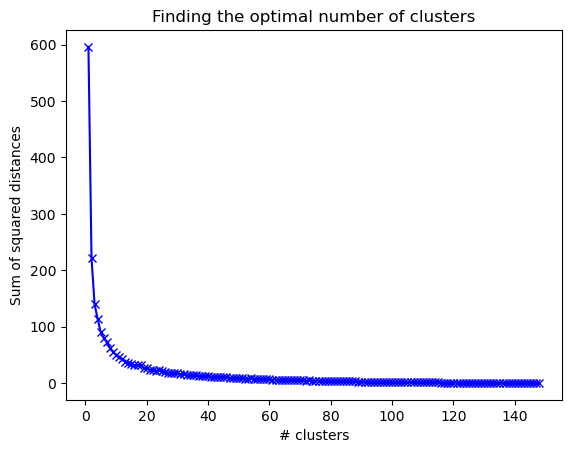

In [57]:
# visualise
n = len(inertias)
xticks_new = np.arange(1, n+1)
plt.plot(xticks_new, inertias[0:n], 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xlabel('# clusters')
plt.ylabel('Sum of squared distances')
plt.show()

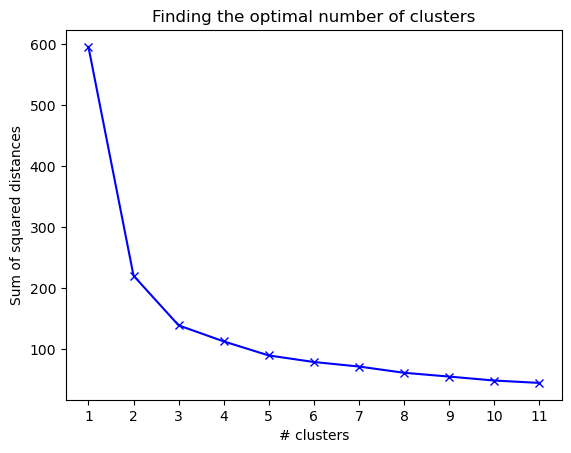

In [58]:
# visualise
n = 11
xticks_new = np.arange(1, n+1)
plt.plot(xticks_new, inertias[0:n], 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xticks(xticks_new)
plt.xlabel('# clusters')
plt.ylabel('Sum of squared distances')
plt.show()

From this plot, we can see that there is a significant drop in terms of the sum of squared distances when passing from `k=1` to `k=2`. We can consider that an elbow point corresponds to `k=3`.

**QUESTIONS**

* Add a column `cluster kmeans` to the `data_cleaned` DataFrame containing the labels of k-means clustering for `k=3`

In [59]:
# ANSWER
# add cluster labels to data_cleaned
data_cleaned['cluster kmeans'] = labels
data_cleaned.head()

,sepal length,sepal width,petal length,petal width,class,cluster kmeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


## Task #5: Cluster Evaluation using Silhouette Coefficient

To evaluate the quality of the clustering, we can use **Silhouette Coefficient**. The Silhouette Coefficient for a sample is given by $(b - a) / max(a, b)$ where `b` is the distance between a sample and the nearest cluster that the sample is not a part of, and `a` is the mean intra-cluster distance (i.e. the mean distance between a sample and all other samples in the same cluster). 

The silhouette score ranges from -1 to 1 and indicates how well each data point fits within its assigned cluster:

* Score near +1 means:
    - The data point is far from neighboring clusters
    - The point is well-matched to its cluster
    - Indicates very distinct, well-separated clustering
* Score near 0 means:
    - The data point is close to the decision boundary between clusters
    - The point could potentially belong to either cluster
    - Suggests overlapping or not well-defined clusters
* Score near -1 means:
    - The data point might be assigned to the wrong cluster
    - The point is closer to points in another cluster than its own
    - Indicates poor clustering or potential misassignments

We can use [`sklearn.metrics.silhouette_score`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html) and [`sklearn.metrics.silhouette_samples`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html)

In [60]:
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples

**QUESTIONS**

* For k-means clustering with `k=3`, calculate Silhouette score for each data point, for each cluster and average silhouette score 
* Display Silhouette score plot
* Comment

In [61]:
# ANSWER
# Calculate silhouette scores
silhouette_avg = silhouette_score(scaled_data, labels, metric='euclidean')
sample_silhouette_values = silhouette_samples(scaled_data, labels, metric='euclidean')
data_cleaned['silhouette kmeans'] = sample_silhouette_values

print(f"Average silhouette score: {silhouette_avg}")
print(f"Sample Silhouette values: {sample_silhouette_values}")

Average silhouette score: 0.4580610105444703
Sample Silhouette values: [ 0.73176138  0.55954974  0.67264854  0.61391261  0.72638092  0.60924468
  0.69509329  0.72778935  0.4777639   0.62492577  0.67255903  0.71863385
  0.57012616  0.54160175  0.55258809  0.4576023   0.62033179  0.72634757
  0.58512218  0.67606961  0.65702737  0.68858636  0.69412602  0.63272796
  0.69790633  0.5354779   0.7015173   0.71904685  0.7114525   0.66259935
  0.61885272  0.64451104  0.58887665  0.54077725  0.62172379  0.6711997
  0.66287109  0.72217431  0.54443766  0.72166058  0.73091334  0.0521396
  0.63204571  0.66100756  0.64739425  0.55044858  0.6773285   0.66103033
  0.687454    0.70692581  0.34913165  0.2019163   0.37005106  0.55368033
  0.09181857  0.53073827  0.26413227  0.43527879 -0.03358982  0.54395031
  0.44512038  0.30319978  0.48078806  0.29458664  0.48949102  0.21435707
  0.35965111  0.55626543  0.40532053  0.5953503   0.1039067   0.44759584
  0.35442262  0.4112121   0.18680721  0.09020433  0.068

In [62]:
# ANSWER
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

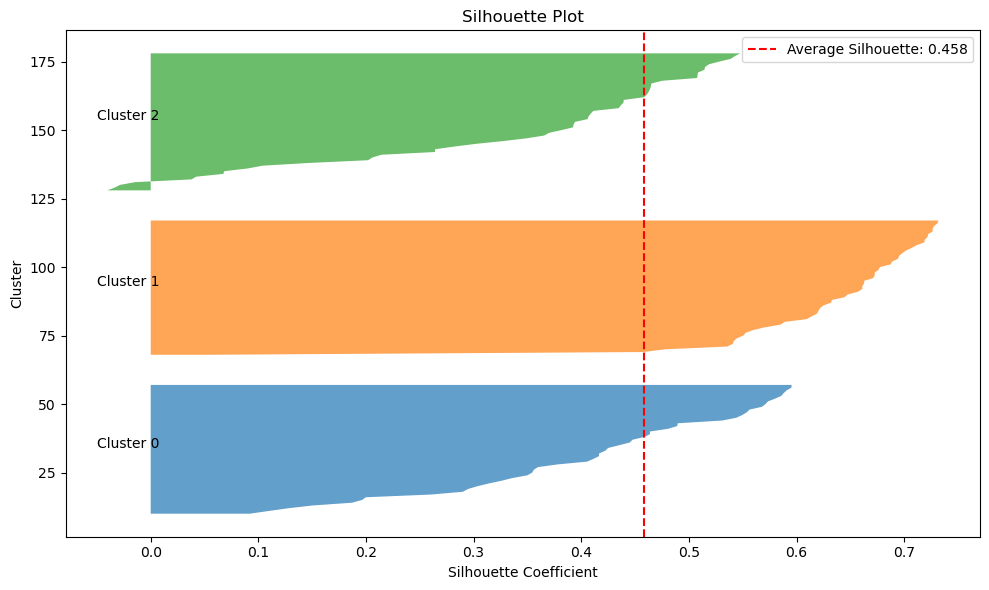

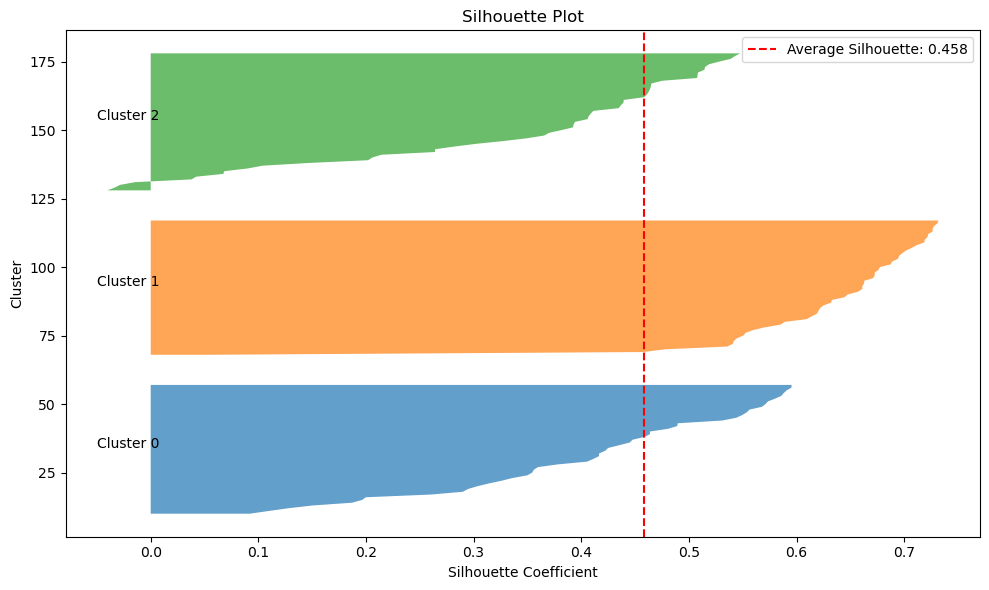

In [63]:
plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3)

In [64]:
# number of elements per cluster
data_cleaned['cluster kmeans'].value_counts()

cluster kmeans
2    51
1    50
0    48
Name: count, dtype: int64

In [65]:
data_cleaned

,sepal length,sepal width,petal length,petal width,class,cluster kmeans,silhouette kmeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0.731761
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0.559550
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0.672649
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0.613913
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0.726381
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,0.475138
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0.199894
147,6.5,3.0,5.2,2.0,Iris-virginica,2,0.411121
148,6.2,3.4,5.4,2.3,Iris-virginica,2,0.406701


In [66]:
# ANSWER
# Silhouette values per cluster
data_cleaned.groupby('cluster kmeans')['silhouette kmeans'].mean()

cluster kmeans
0    0.409071
1    0.632086
2    0.333556
Name: silhouette kmeans, dtype: float64

As general guidelines, the plot can be interpreted by looking at:
* *the thickness of the clusters (number of points)*: in our case, the clusters are almost of the same size (e.g. 0: 55, 1:49, 2:45 <- note that the exact numbers can vary depending on the random seed);
* *check if any cluster has many negative values*: in our case, Cluster 1 and Cluster 2 contain some negative values but not many;
* *check the consistency of the silhouette widths within clusters*: we note that Cluster 1 and Cluster 2 have big range of silhouette values;
* *the average value*. Recall that in general, the following interpretation applies:
    - \> 0.7: Strong clustering structure
    - 0.5 - 0.7: Reasonable clustering structure
    - 0.25 - 0.5: Weak clustering structure
    - < 0.25: No substantial clustering structure

In our case the average Silhouette score equals to 0.459 (! can vary depending on the results of k-means) which can be considered as rather weak clustering structure. Only Cluster 1 is always higher than this average score.
* *Cluster Silhouette scores*: in our case, 0: 0.65, 1: 0.2, 2: 0.39. For Cluster 1 and Cluster 2, the scores are low. 

## Task #6: Apply Hierarchical Clustering

**QUESTIONS**

* Apply Agglomerative clustering with different linkage options: complete, average, single. 

*Hint*: use [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
* For each linkage, draw a dendrogram. 

*Hint*: check [this example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
* Calculate the silhouette scores

In [67]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [68]:
# ANSWER
def plot_dendrogram(model, lbls, title='Hierarchical Clustering Dendrogram', x_title='Flowers', **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
           model.children_,
           model.distances_,
           counts
       ]).astype(float)

    fig = plt.figure(figsize=(12, 8))
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=lbls, leaf_rotation=90)
    
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Distance')
    
    fig.show()
    
    return fig

In [69]:
# ANSWER
def hierarchical(data, labels, metric='euclidean', linkage='average', n_clusters=None, dist_thres=None):
    model = AgglomerativeClustering(distance_threshold=dist_thres, n_clusters=n_clusters, metric=metric, linkage=linkage, compute_full_tree=True, compute_distances=True)
    model = model.fit(data)
    
    txt_title = 'Hierarchical Clustering Dendrogram' + ', linkage: ' + linkage
    f = plot_dendrogram(model=model, lbls=labels, title=txt_title, x_title='Flowers')
    
    return model, f

C:\Users\dnurb\AppData\Local\Temp\ipykernel_12392\2492823133.py:32: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



Linkage: complete, silhouette score: 0.4520950246989914


C:\Users\dnurb\AppData\Local\Temp\ipykernel_12392\2492823133.py:32: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



Linkage: average, silhouette score: 0.4789840044974272


C:\Users\dnurb\AppData\Local\Temp\ipykernel_12392\2492823133.py:32: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



Linkage: single, silhouette score: 0.503483335724129


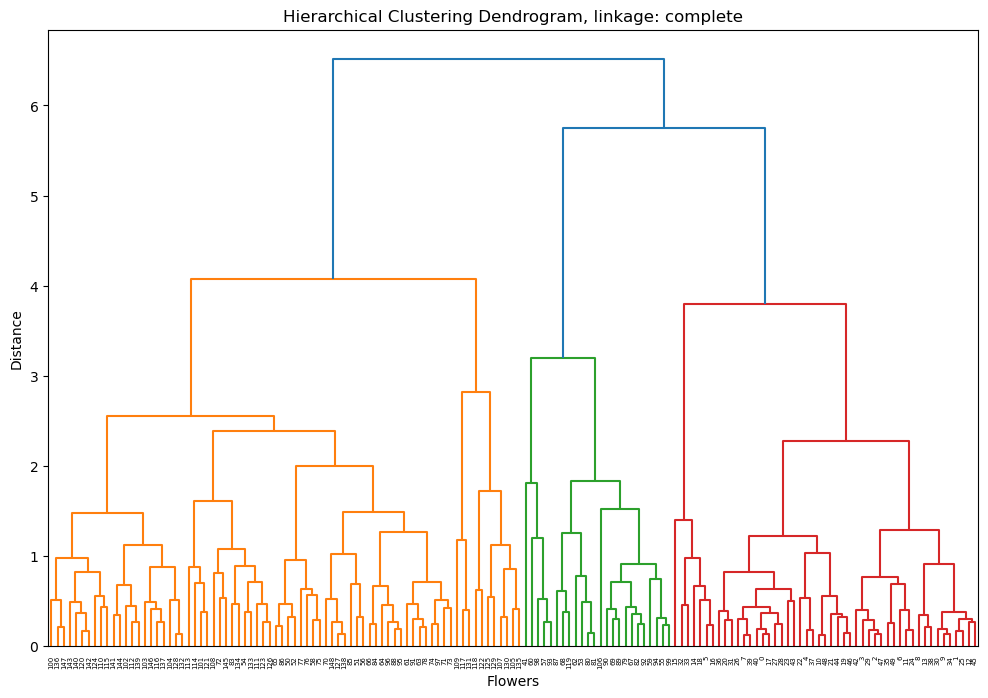

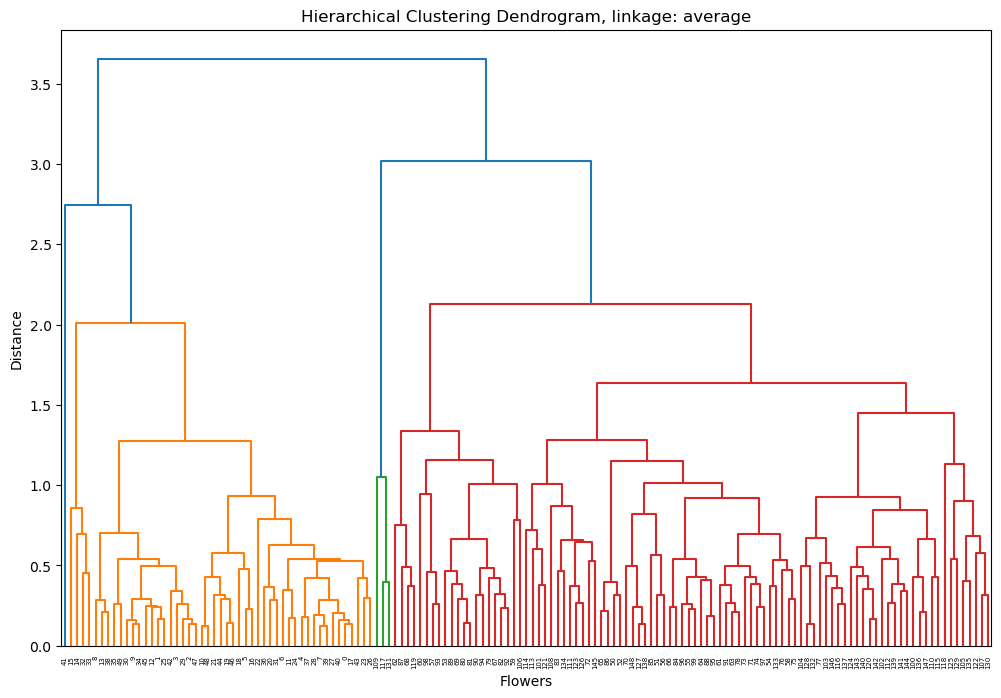

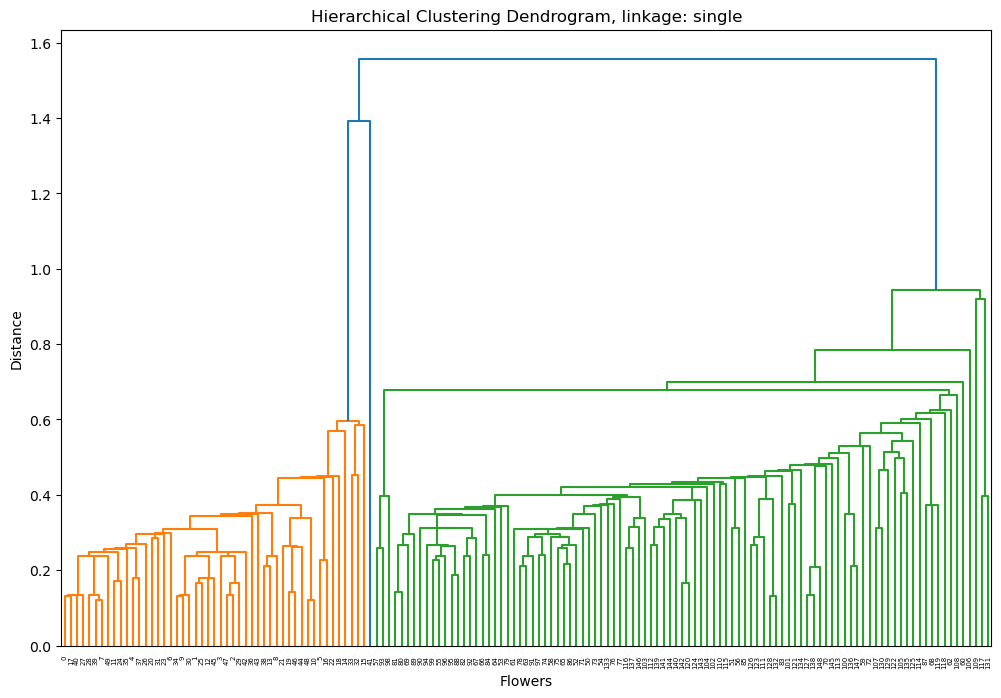

In [70]:
# types of linkage to consider
linkage = ['complete', 'average', 'single']

for link in linkage:
    m, f = hierarchical(scaled_data, list(scaled_data_df.index), metric='euclidean', linkage=link, n_clusters=3, dist_thres=None)
    
    data_cleaned['cluster ' + link] = m.labels_
    silhouette_avg = silhouette_score(scaled_data, m.labels_, metric='euclidean')
    sample_silhouette_values = silhouette_samples(scaled_data, m.labels_, metric='euclidean')
    data_cleaned['silhouette ' + link] = sample_silhouette_values
    
    print(f"Linkage: {link}, silhouette score: {silhouette_avg}")

In [71]:
data_cleaned

,sepal length,sepal width,petal length,petal width,class,cluster kmeans,silhouette kmeans,cluster complete,silhouette complete,cluster average,silhouette average,cluster single,silhouette single
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0.731761,1,0.743924,0,0.760511,2,0.715421
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0.559550,1,0.522544,0,0.639390,2,0.293484
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0.672649,1,0.660844,0,0.722728,2,0.536624
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0.613913,1,0.588303,0,0.678913,2,0.397670
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0.726381,1,0.740117,0,0.752635,2,0.713199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,0.475138,0,0.527398,1,0.297654,0,0.637463
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0.199894,0,0.078851,1,0.569467,0,0.590893
147,6.5,3.0,5.2,2.0,Iris-virginica,2,0.411121,0,0.533181,1,0.443370,0,0.659175
148,6.2,3.4,5.4,2.3,Iris-virginica,2,0.406701,0,0.472540,1,0.054508,0,0.521277


## Task #7: Apply DBSCAN

**QUESTIONS**

* Apply [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm
* Identify the best values for `eps` and `min_sanples` by varying the values within a range and by using Silhouette coefficient

In [72]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [73]:
# ANSWER
min_pnts = 4

As Tan *et al.* state:
> The basic approach is to look at the behavior of the distance from a point to its $k$-th nearest neighbor, which we will call the $k$-dist. For points that belong to some cluster, the value of $k$-dist will be small if $k$ is not larger than the cluster size. Note that there will be some variation, depending on the density of the cluster and the random distribution of points, but on average, the range of variation will not be huge if the cluster densities are not radically different. However, for points that are not in a cluster, such as noise points, the $k$-dist will be relatively large. Therefore, if we compute the $k$-dist for all the data points for some k, sort them in increasing order, and then plot the sorted values, we expect to see a sharp change at the value of $k$-dist that corresponds to a suitable value of $Eps$. If we select this distance as the $Eps$ parameter and take the value of k as the MinPts parameter, then points for which $k$-dist is less than $Eps$ will be labeled as core points, while other points will be labeled as noise or border points.

In [74]:
# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors

In [75]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

In [76]:
# ANSWER
fig = find_optimal_eps(scaled_data, min_pnts)
fig.show() # display the plot

According to the plot above, a candidate value for $Eps$ is 1.048.

In [77]:
# ANSWER
best_eps = 1.048
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_data)

In [78]:
data_cleaned['cluster dbscan'] = best_labels
data_cleaned['silhouette dbscan'] = silhouette_samples(scaled_data, best_labels, metric='euclidean')

## Task #8: Cluster Characterisation using Apriori algorithm

Now, we would like to describe the obtained cluster. To do so, let's use frequent pattern mining and in particular **Apriori algorithm**. 

**QUESTIONS**
* First, convert numerical features to categorical (low, medium, high) based on quantiles. Add binary columns, e.g. `sepal length low`, `sepal length medium`, `sepal length high` depending on the values. 

*Hint*: to do so, you can use [`quantile()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) method.

In [79]:
# ANSWER
df_binary = data_cleaned.copy()
for col in features:
    q1 = data_cleaned[col].quantile(0.33)
    q2 = data_cleaned[col].quantile(0.66)
    
    df_binary[f"{col} low"] = (data_cleaned[col] <= q1).astype(int)
    df_binary[f"{col} medium"] = ((data_cleaned[col] > q1) & (data_cleaned[col] <= q2)).astype(int)
    df_binary[f"{col} high"] = (data_cleaned[col] > q2).astype(int)

In [80]:
df_binary

,sepal length,sepal width,petal length,petal width,class,cluster kmeans,silhouette kmeans,cluster complete,silhouette complete,cluster average,...,sepal length high,sepal width low,sepal width medium,sepal width high,petal length low,petal length medium,petal length high,petal width low,petal width medium,petal width high
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0.731761,1,0.743924,0,...,0,0,0,1,1,0,0,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0.559550,1,0.522544,0,...,0,0,1,0,1,0,0,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0.672649,1,0.660844,0,...,0,0,1,0,1,0,0,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0.613913,1,0.588303,0,...,0,0,1,0,1,0,0,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0.726381,1,0.740117,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,0.475138,0,0.527398,1,...,1,0,1,0,0,0,1,0,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0.199894,0,0.078851,1,...,1,1,0,0,0,0,1,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2,0.411121,0,0.533181,1,...,1,0,1,0,0,0,1,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,2,0.406701,0,0.472540,1,...,0,0,0,1,0,0,1,0,0,1


To find frequent patterns, we are going to use the following implementation of Apriori algorithm [mlxtend.frequent_patterns.apriori](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/).

In [81]:
# frequent patterns
from mlxtend.frequent_patterns import apriori

We will need to specify `min_support` as a parameter.

In [82]:
def cluster_chars(df, binary_cols, cluster_col, min_support=0.3, min_confidence=0.6):
    cluster_characteristics = {}
    
    cluster_labels = df[cluster_col].unique()
    #print(cluster_labels)
    
    all_itemsets = []
    
    for cluster in cluster_labels:
        # Get data for this cluster
        cluster_data = df_binary[df_binary[cluster_col] == cluster][binary_cols]
        #print(cluster_data.head())
        
        # Find frequent itemsets
        frequent_itemsets = apriori(cluster_data, 
                                  min_support=min_support, 
                                  use_colnames=True)
        
        # add cluster number and store the results 
        if len(frequent_itemsets) > 0:
            frequent_itemsets['cluster'] = cluster
            all_itemsets.append(frequent_itemsets)
            
    # Combine all itemsets into one DataFrame
    all_itemsets_df = pd.concat(all_itemsets)
    
    # Find characteristic itemsets for each cluster
    characteristic_itemsets = {}
    for cluster in cluster_labels:
        # Get itemsets for this cluster
        cluster_itemsets = all_itemsets_df[all_itemsets_df['cluster'] == cluster]
        
        # Get itemsets that appear in other clusters
        other_clusters_itemsets = all_itemsets_df[all_itemsets_df['cluster'] != cluster]
        
        # Find unique itemsets for this cluster
        unique_itemsets = []
        for _, row in cluster_itemsets.iterrows():
            itemset = row['itemsets']
            # Check if this itemset appears in other clusters
            appears_elsewhere = False
            for _, other_row in other_clusters_itemsets.iterrows():
                if other_row['itemsets'] == itemset:
                    appears_elsewhere = True
                    break
            
            if not appears_elsewhere:
                unique_itemsets.append({
                    'itemset': itemset,
                    'support': row['support']
                })
        
        characteristic_itemsets[cluster] = unique_itemsets
    
    return all_itemsets_df, characteristic_itemsets

In [83]:
binary_cols = ['sepal length low', 'sepal length medium',
       'sepal length high', 'sepal width low', 'sepal width medium',
       'sepal width high', 'petal length low', 'petal length medium',
       'petal length high', 'petal width low', 'petal width medium',
       'petal width high']
all_itemsets_df, cluster_characteristics = cluster_chars(df_binary, binary_cols, 'cluster kmeans', min_support=0.6, min_confidence=0.6)

c:\Users\dnurb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

c:\Users\dnurb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

c:\Users\dnurb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [84]:
cluster_characteristics[1]

[{'itemset': frozenset({'sepal length low'}), 'support': 0.9},
 {'itemset': frozenset({'sepal width high'}), 'support': 0.66},
 {'itemset': frozenset({'petal length low'}), 'support': 1.0},
 {'itemset': frozenset({'petal width low'}), 'support': 0.98},
 {'itemset': frozenset({'petal length low', 'sepal length low'}),
  'support': 0.9},
 {'itemset': frozenset({'petal width low', 'sepal length low'}),
  'support': 0.88},
 {'itemset': frozenset({'petal length low', 'sepal width high'}),
  'support': 0.66},
 {'itemset': frozenset({'petal width low', 'sepal width high'}),
  'support': 0.64},
 {'itemset': frozenset({'petal length low', 'petal width low'}),
  'support': 0.98},
 {'itemset': frozenset({'petal length low',
             'petal width low',
             'sepal length low'}),
  'support': 0.88},
 {'itemset': frozenset({'petal length low',
             'petal width low',
             'sepal width high'}),
  'support': 0.64}]

In [85]:
# Print results
for cluster, itemsets in cluster_characteristics.items():
    print(f"\nCluster {cluster} characteristic itemsets:")
    if len(itemsets) > 0:
        for item in itemsets:
            print(f"Itemset: {item['itemset']}, Support: {item['support']:.3f}")
    else:
        print("No characteristic itemsets found")


Cluster 1 characteristic itemsets:
Itemset: frozenset({'sepal length low'}), Support: 0.900
Itemset: frozenset({'sepal width high'}), Support: 0.660
Itemset: frozenset({'petal length low'}), Support: 1.000
Itemset: frozenset({'petal width low'}), Support: 0.980
Itemset: frozenset({'sepal length low', 'petal length low'}), Support: 0.900
Itemset: frozenset({'sepal length low', 'petal width low'}), Support: 0.880
Itemset: frozenset({'petal length low', 'sepal width high'}), Support: 0.660
Itemset: frozenset({'petal width low', 'sepal width high'}), Support: 0.640
Itemset: frozenset({'petal length low', 'petal width low'}), Support: 0.980
Itemset: frozenset({'sepal length low', 'petal length low', 'petal width low'}), Support: 0.880
Itemset: frozenset({'petal length low', 'petal width low', 'sepal width high'}), Support: 0.640

Cluster 2 characteristic itemsets:
Itemset: frozenset({'sepal length high'}), Support: 0.863
Itemset: frozenset({'petal length high'}), Support: 0.784
Itemset: fr